## To make plots interactive:

In [15]:
# This command installs ipympl
#!pip3 install ipympl

In [16]:
# This magic command makes plots interactive
%matplotlib notebook
#%matplotlib widget

In [17]:
from transCSSR import *
import matplotlib.pyplot as plt

import graphviz
from sklearn.metrics import log_loss

import itertools

In [26]:
# for i in range(1,137):
for i in [12]:
    data_prefix = ''
    Yt_name = ('user%s' % i)
    Xt_name = ''

    machine_fname = '+.dot'
    transducer_fname = '+{}.dot'.format(Yt_name)

    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

    stringYs = open(('CSSR-Data/cssrData-%s.txt' % i).format(data_prefix, Yt_name)).readlines()

    stringY = ""

    for y in stringYs:
        stringY += y.strip()
    

    if Xt_name == '':
        stringX = '0'*len(stringY)
    else:
        stringX = open(('CSSR-Data/cssrData-%s.txt' % i).format(data_prefix, Xt_name)).readline().strip()
    
    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

    axs = ['0']
    ays = ['0', '1']

    e_symbols = list(itertools.product(axs, ays)) # All of the possible pairs of emission
                                              # symbols for (x, y)

    alpha = 0.001

    verbose = False

    # L is the maximum amount we want to ever look back.

    L_max = 15

    inf_alg = 'transCSSR'

    Tx = len(stringX); Ty = len(stringY)

    assert Tx == Ty, 'The two time series must have the same length.'

    T = Tx

    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    
    model_selection_output = choose_L_eM(stringX, stringY, L_max, axs, ays, e_symbols, Xt_name, Yt_name, alpha = 0.001, test_type = 'chi2', fname = None, is_multiline = False, verbose = True, all_digits = True)

In [27]:
model_selection_output

{'epsilon': {('0000', '0000'): 1,
  ('0000', '1000'): 3,
  ('0000', '0001'): 2,
  ('0000', '1001'): 2,
  ('0000', '0101'): 2,
  ('0000', '1101'): 2,
  ('0000', '0011'): 2,
  ('0000', '1011'): 2,
  ('0000', '0111'): 2,
  ('0000', '1111'): 2,
  ('0000', '0100'): 4,
  ('0000', '1100'): 4,
  ('0000', '0010'): 5,
  ('0000', '1010'): 5,
  ('0000', '0110'): 5,
  ('0000', '1110'): 5,
  ('00000', '00000'): 1,
  ('00000', '10000'): 1,
  ('00000', '00001'): 2,
  ('00000', '10001'): 2,
  ('00000', '01001'): 2,
  ('00000', '11001'): 2,
  ('00000', '00101'): 2,
  ('00000', '10101'): 2,
  ('00000', '01101'): 2,
  ('00000', '11101'): 2,
  ('00000', '00011'): 2,
  ('00000', '10011'): 2,
  ('00000', '01011'): 2,
  ('00000', '11011'): 2,
  ('00000', '00111'): 2,
  ('00000', '10111'): 2,
  ('00000', '01111'): 2,
  ('00000', '11111'): 2,
  ('00000', '01000'): 3,
  ('00000', '11000'): 3,
  ('00000', '00100'): 4,
  ('00000', '10100'): 4,
  ('00000', '01100'): 4,
  ('00000', '11100'): 4,
  ('00000', '00010'):

<IPython.core.display.Javascript object>


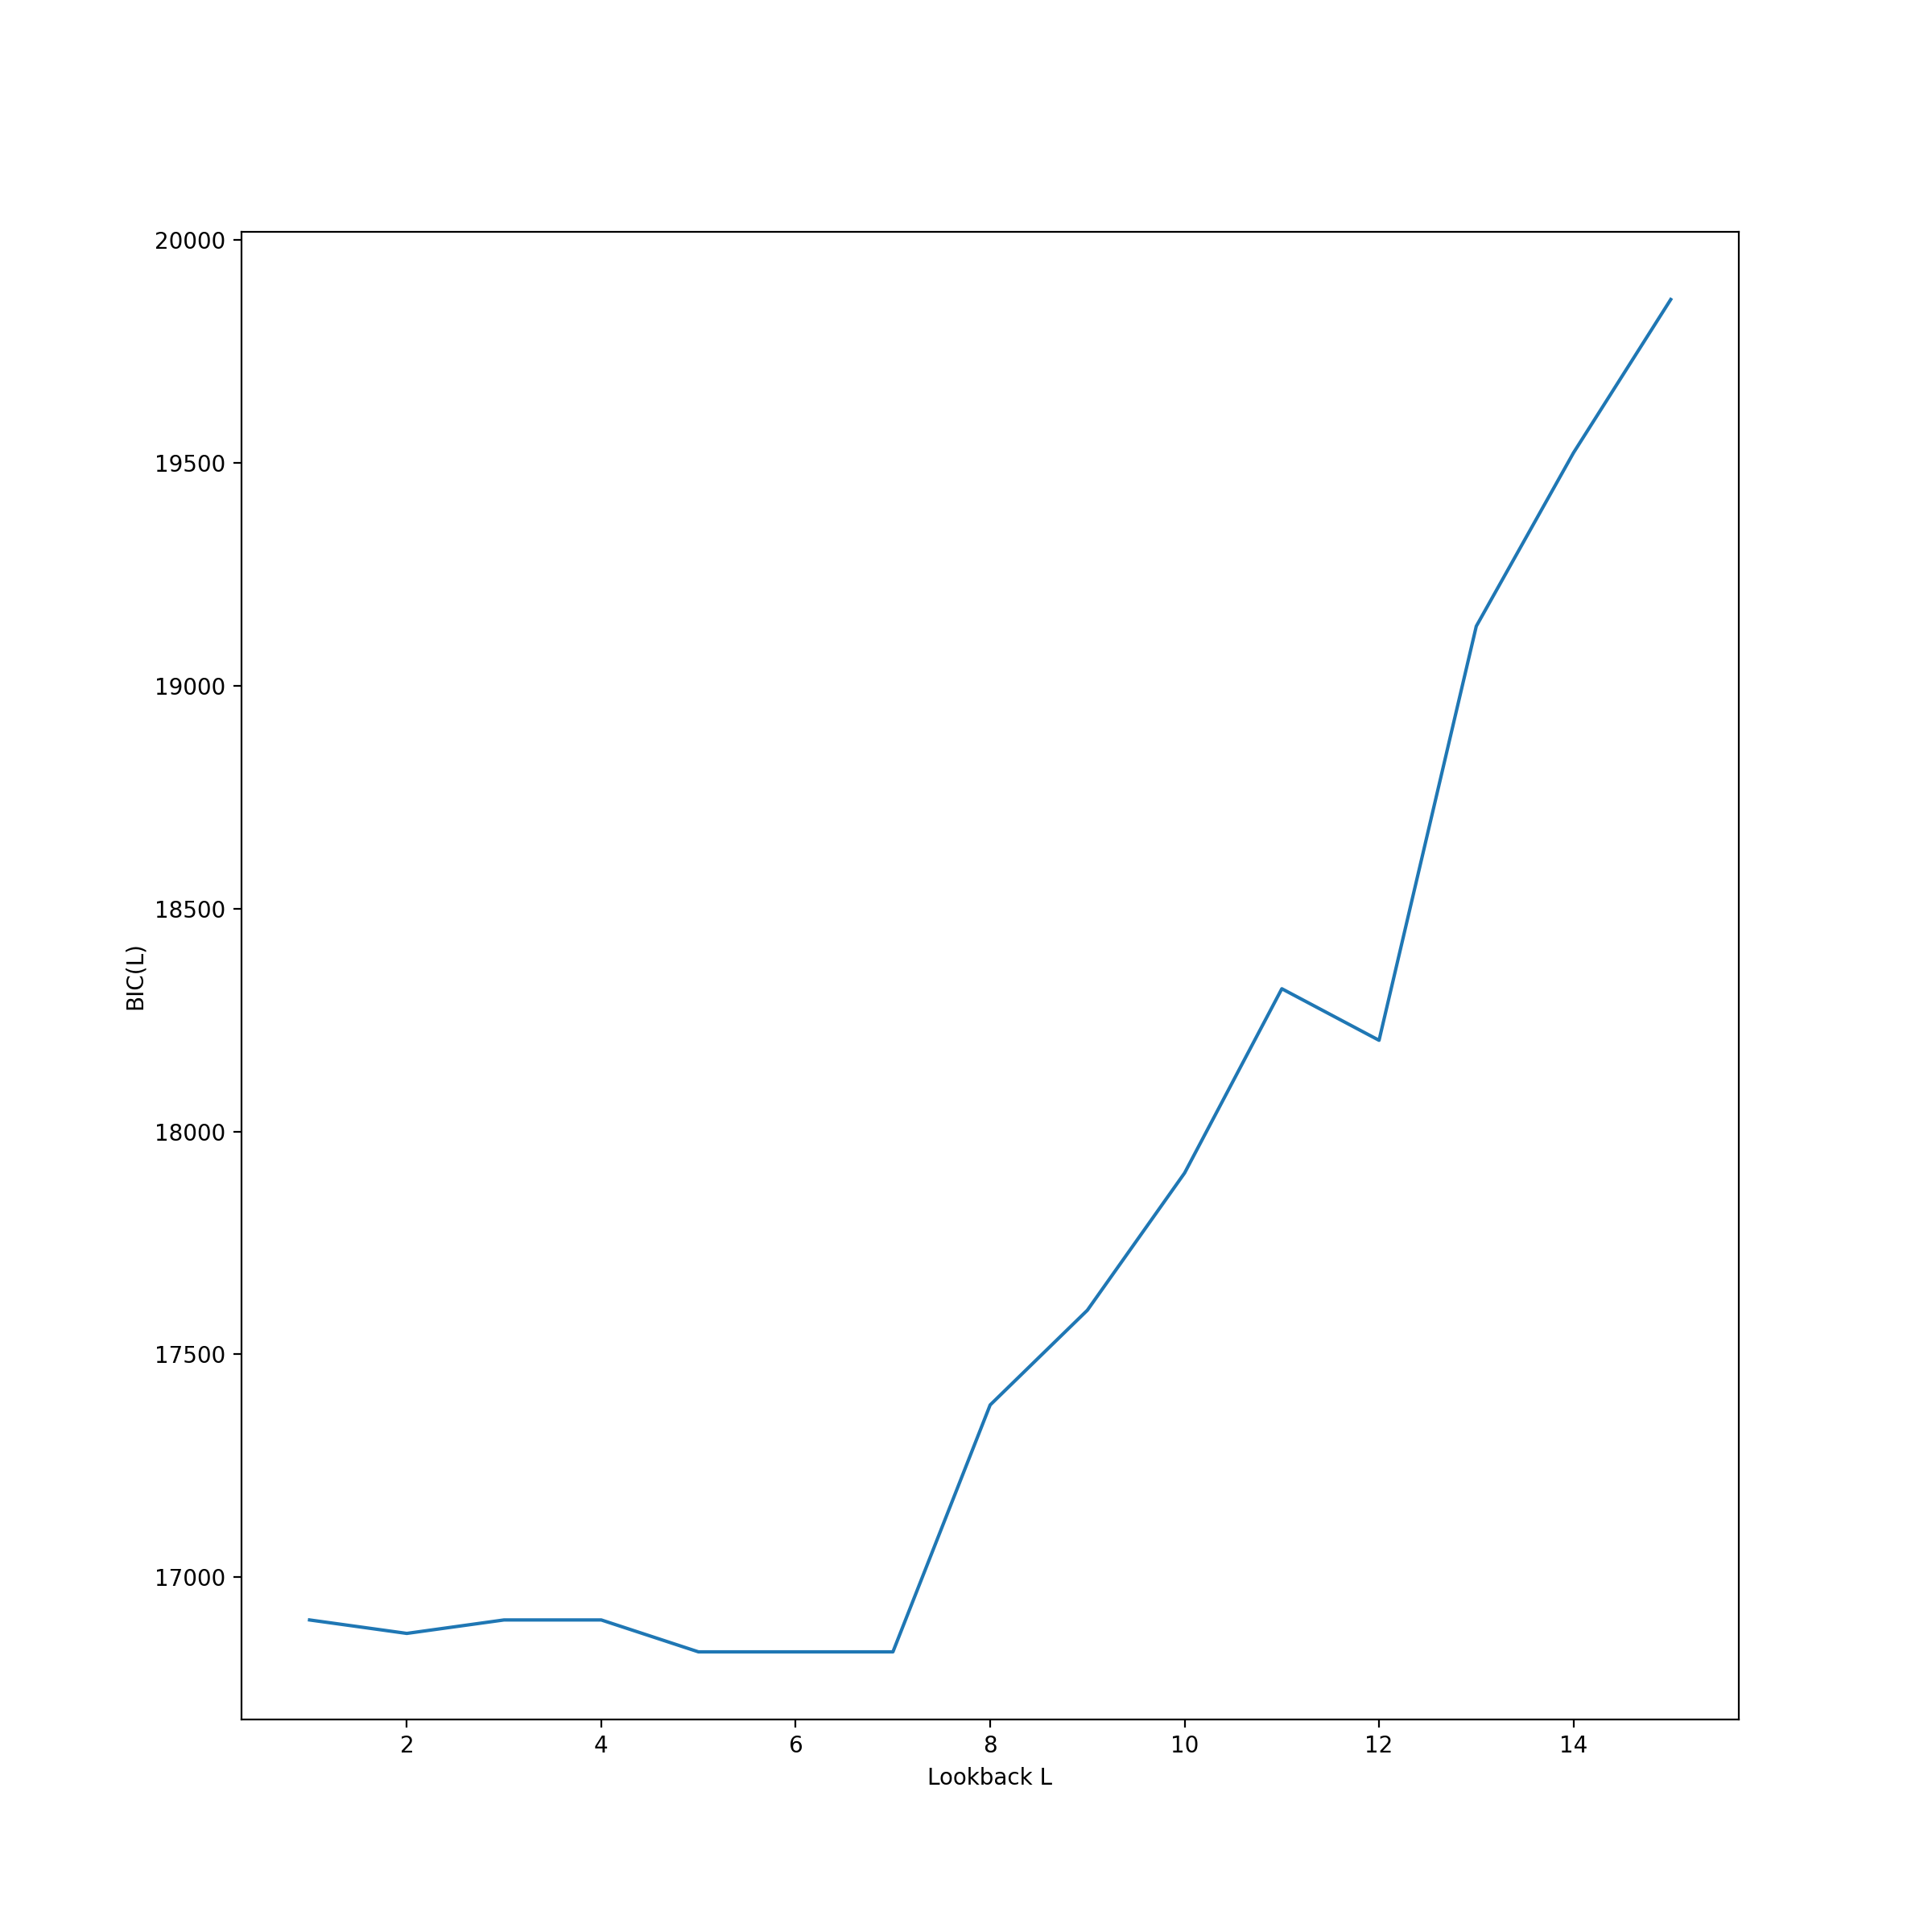

Text(0, 0.5, 'BIC(L)')

In [28]:
plt.figure(figsize=(12,12))
plt.plot(range(1, len(model_selection_output['bic_by_L'])+1), model_selection_output['bic_by_L'])
plt.xlabel('Lookback L')
plt.ylabel('BIC(L)')

## Demo Predicting Probabilities 

In [33]:
# ?filter_and_pred_probs

In [34]:
pred_probs_by_time, cur_states_by_time = filter_and_pred_probs(stringX, stringY, 'transCSSR_results/' + machine_fname, 'transCSSR_results/' + transducer_fname, axs, ays, inf_alg='transCSSR')

In [35]:
stringY[-21:]

'000010000000000000000'

In [36]:
pred_probs_by_time[-20:, :]

array([[0.954198  , 0.045802  ],
       [0.954198  , 0.045802  ],
       [0.954198  , 0.045802  ],
       [0.954198  , 0.045802  ],
       [0.85271666, 0.14728334],
       [0.91521854, 0.08478146],
       [0.91944764, 0.08055236],
       [0.922403  , 0.077597  ],
       [0.954198  , 0.045802  ],
       [0.954198  , 0.045802  ],
       [0.954198  , 0.045802  ],
       [0.954198  , 0.045802  ],
       [0.954198  , 0.045802  ],
       [0.954198  , 0.045802  ],
       [0.954198  , 0.045802  ],
       [0.954198  , 0.045802  ],
       [0.954198  , 0.045802  ],
       [0.954198  , 0.045802  ],
       [0.954198  , 0.045802  ],
       [0.954198  , 0.045802  ]])

<IPython.core.display.Javascript object>


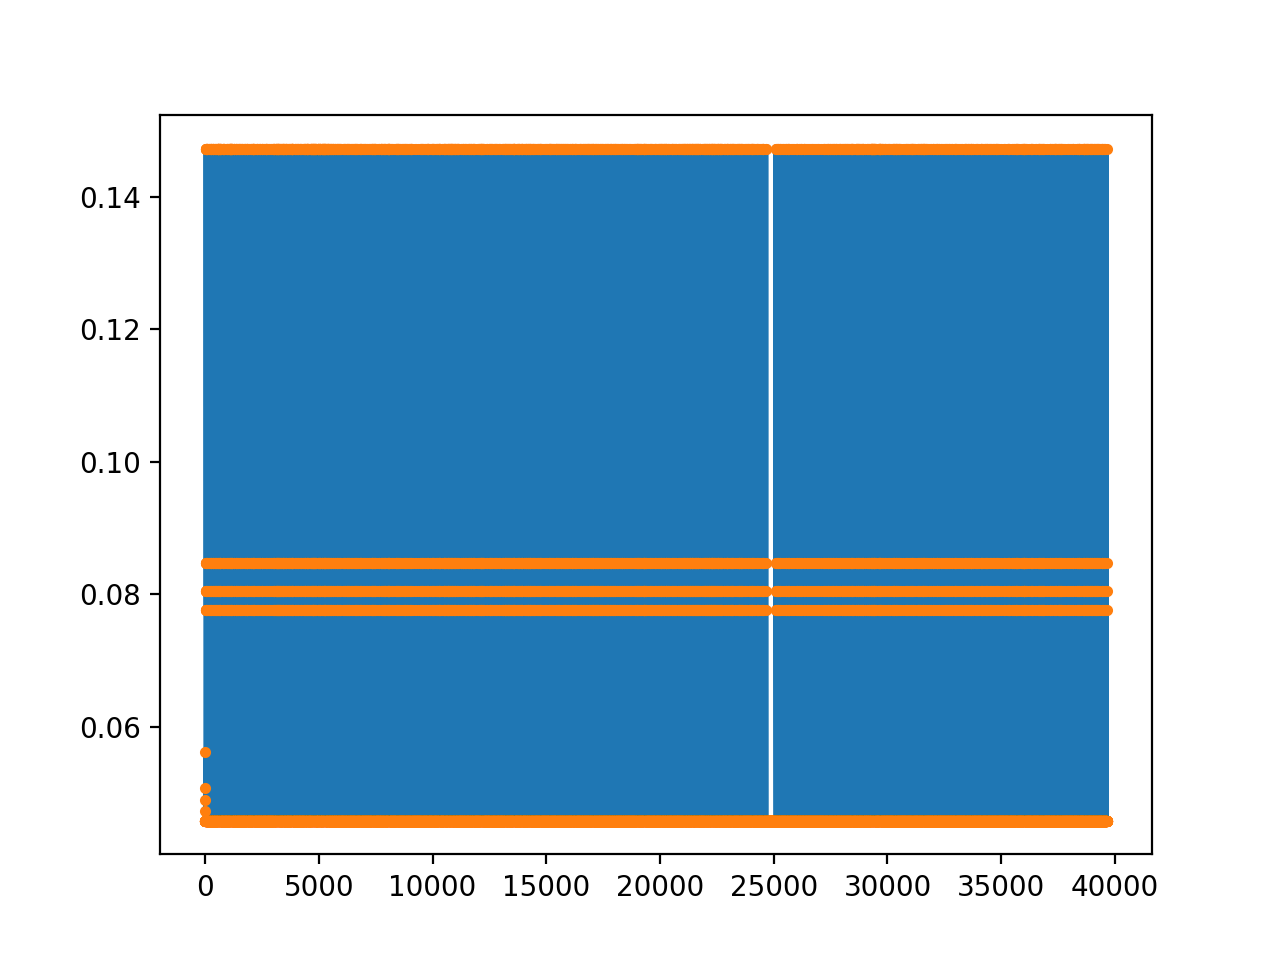

In [39]:
plt.figure()
plt.plot(pred_probs_by_time[:, 1], '-')
plt.plot(pred_probs_by_time[:, 1], '.')
plt.show()